# Assignment 1 

# Importing all relevant libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

##  Loading the dataset

   Using Pandas, pd.read_csv() method to load/read the data which is in a csv format.

In [2]:
df = pd.read_csv('Kaggle_Salary.csv')

## Analyzing our loaded dataset

Let's have a look at our data.

In [3]:
# Printing the first 5 rows of our dataframe using head().

df.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,NaN
1,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
2,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
3,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
4,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0


In [4]:
#To find the size of our dataset, we can use Dataframe.shape() method:

print("The shape of the dataset :", df.shape[0])

The shape of the dataset : 15430


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15430 entries, 0 to 15429
Columns: 397 entries, Unnamed: 0 to index
dtypes: float64(1), int64(1), object(395)
memory usage: 46.7+ MB


From the above result, we get to know the total number of entries in our dataframe and the datatypes in our dataset.

In [6]:
df.describe()

,Unnamed: 0,index
count,15430.000000,15429.000000
mean,10834.065587,7714.000000
std,6615.191701,4454.112987
min,0.000000,0.000000
25%,5154.500000,3857.000000
50%,10415.000000,7714.000000
75%,16086.500000,11571.000000
max,23857.000000,15428.000000


# 1. DATA CLEANING

As we can see, the first row of our dataframe is the name of the question. So, I am going to remove it from the dataframe and store it separately for EDA purpose.

In [7]:
question = df.iloc[0]
df = df.drop(0, axis=0)

#### Analyzing our target column i.e. Salary Column

In [8]:
#Printing the question name of the target column(Q9):

print(question['Q9'])

What is your current yearly compensation (approximate $USD)?


In [9]:
#Printing the unique values in target columns.

print(df['Q9'].unique())

['10-20,000' '0-10,000' '20-30,000' '125-150,000' '30-40,000' '50-60,000'
 '100-125,000' '90-100,000' '70-80,000' '80-90,000' '60-70,000'
 '400-500,000' '40-50,000' '150-200,000' '500,000+' '300-400,000'
 '200-250,000' '250-300,000']


Here, the unique() method prints the unique values in the specified column.

Now, I am dropping the null values from the target column and neglecting the non numerical values, because only numerical values interest us.

In [10]:
df = df[df['Q9'].notnull()]
df = df[df['Q9'] != 'I do not wish to disclose my approximate yearly compensation']

In [11]:
#Shape of dataset after extracting the numerical value fields of target column.

print(df.shape[0])

15429


#### The below is a count plot of our target column i.e. salary column to get an idea of count of our salary classes.

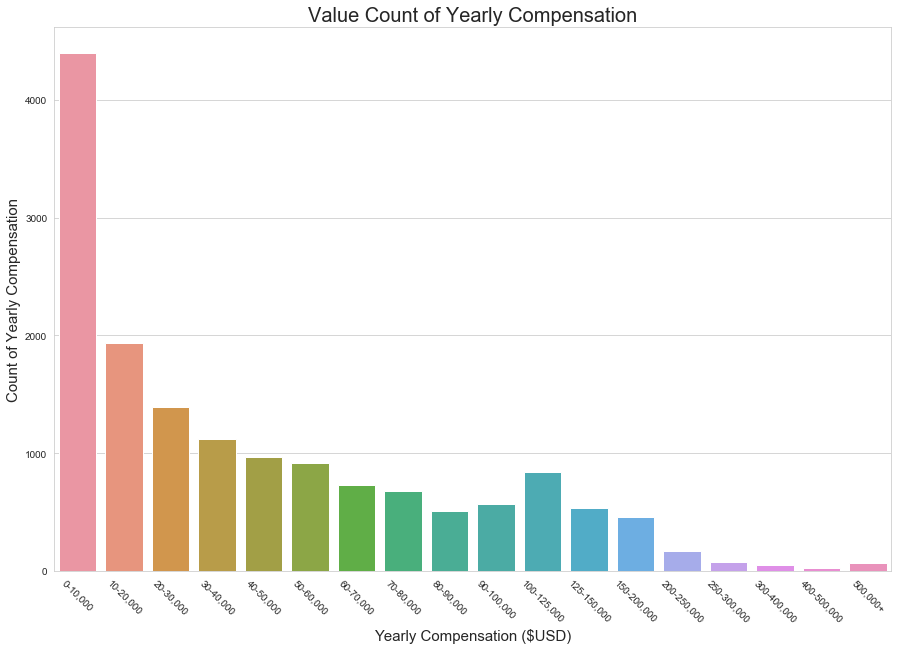

In [12]:
order = ['0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000', 
  '50-60,000', '60-70,000', '70-80,000', '80-90,000', '90-100,000', 
  '100-125,000', '125-150,000', '150-200,000', '200-250,000', '250-300,000', 
  '300-400,000', '400-500,000', '500,000+']

plt.figure(figsize=(15,10))
sns.countplot(df['Q9'], order=order)
plt.xticks(rotation=-45)
plt.xlabel("Yearly Compensation ($USD)", fontsize=15)
plt.ylabel("Count of Yearly Compensation", fontsize=15)
plt.title("Value Count of Yearly Compensation", fontsize=20)
plt.show()

For visualization purpose, I will convert the target to numerical values by taking their mean of the interval.

In [13]:
a   = {'0-10,000': 5000, '10-20,000': 15000, '20-30,000': 25000, '30-40,000': 35000, 
       '40-50,000': 45000, '50-60,000': 55000, '60-70,000': 65000, '70-80,000': 75000, 
       '80-90,000': 85000, '90-100,000': 95000, '100-125,000': 112500, 
       '125-150,000': 137500, '150-200,000': 175000, '200-250,000': 225000, 
       '250-300,000': 275000, '300-400,000': 350000, '400-500,000': 450000, 
       '500,000+':500000}

df['Yearly Compensation'] = df['Q9'].apply(lambda x: a[x])

#### Can we spot obvious fake surveys ?

For instance, I noticed some students who make half a million a year!!!! I guess, I must learn from them!!

In [14]:
fake = df[df['Q6'] == "Student"]
fake = fake[fake['Yearly Compensation'] >= 500000]

In [15]:
fake

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index,Yearly Compensation
8266,11146,1501,Male,-1,18-21,United States of America,Bachelor’s degree,"Information technology, networking, or system ...",Student,-1,...,Too time-consuming,Requires too much technical knowledge,Afraid that others will use my work without gi...,Not enough incentives to share my work,I had never considered making my work easier f...,NaN,NaN,-1,8265.0,500000
11136,15285,505,Male,-1,18-21,India,No formal education past high school,NaN,Student,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,11135.0,500000
13896,20576,197,Prefer to self-describe,65,25-29,Belgium,Master’s degree,"Computer science (software engineering, etc.)",Student,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,13895.0,500000
14026,20875,271,Male,-1,18-21,India,Bachelor’s degree,"Computer science (software engineering, etc.)",Student,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,14025.0,500000


Come on, you can't be a student and earn more than 500k a year. But if you do, please tell me the trick. To avoid obvious fake surveys, I will exclude people who earn more than 500k.

In [16]:
df = df[df['Yearly Compensation'] < 500000]

I am taking only those values of gender which has *Male* and *Female*. I excluded other values such as 'Prefer not to say' and 'Prefer to self-describe' because, I don't think they contribute any use to our problem.

In [17]:
df = df[df.Q1.isin(['Male', 'Female'])]

## 2. EXPLORATORY DATA ANALYSIS

I'm going to go through the questions, checking if they can be used for the prediction task.


### 2.1 - Gender

In [18]:
#Printing the name of question 1 i.e. Gender column:

print(question['Q1'])

What is your gender? - Selected Choice


Gender is always an interesting feature. Let's see what we got.

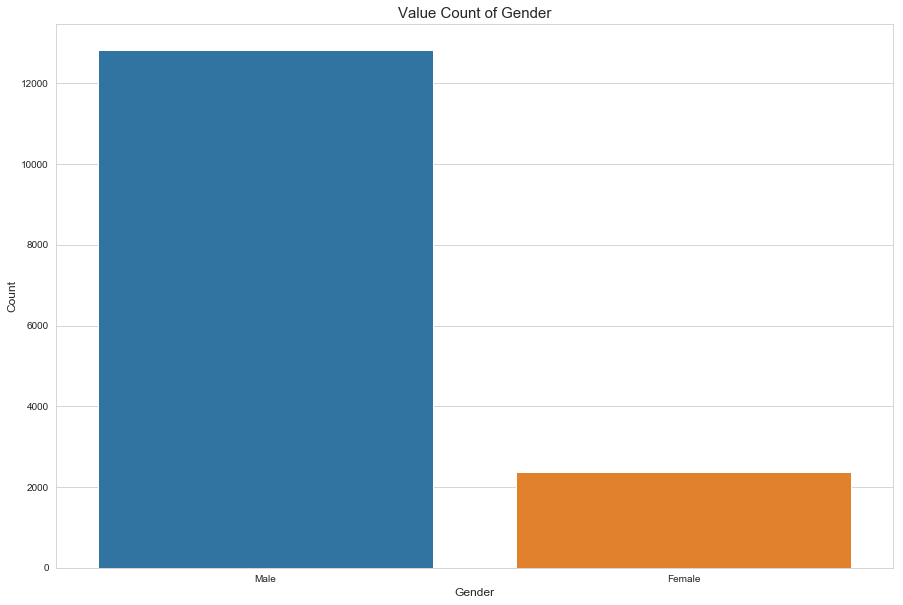

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(df['Q1'])
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Value Count of Gender", fontsize=15)
plt.show()
plt.show()

From the above count plot, it is evident that the count of male candidates is way more than that of females. But, from this alone we cannot conclude that male earn more than female.

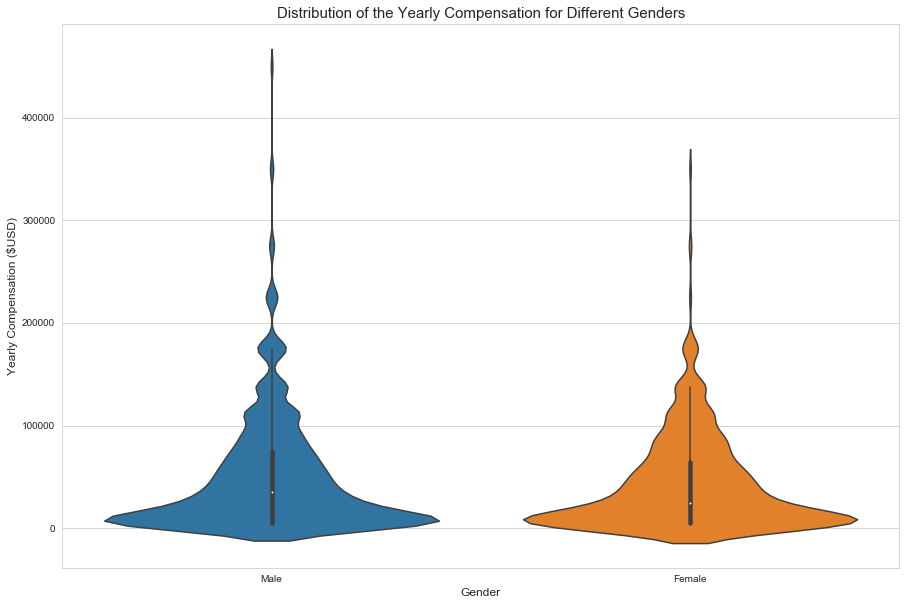

In [20]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q1', y='Yearly Compensation', data=df)
plt.ylabel("Yearly Compensation ($USD)", fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.title("Distribution of the Yearly Compensation for Different Genders", fontsize=15)
plt.show()

The distribution of male and female salaries is quite similar so far. I am a bit more concerned about the other categories from our dataset.

### 2.2 - Age

In [21]:
#Printing the name of question 2 i.e. Age column:

print(question['Q2'])

What is your age (# years)?


Age is generally considered to be an interesting feature, but let's see the count plot of the age values from our dataset

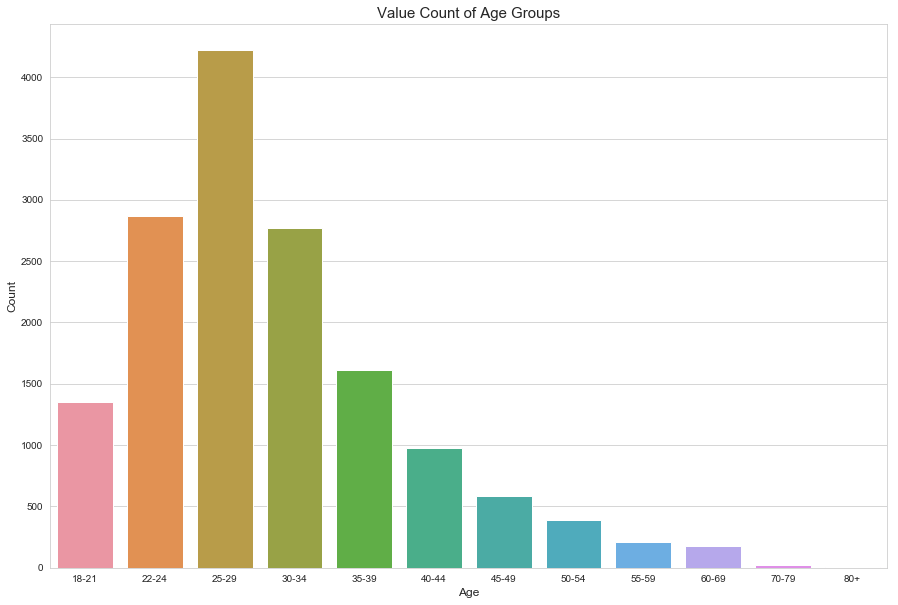

In [22]:
order = ['18-21', '22-24', '25-29', '30-34','35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70-79', '80+']
plt.figure(figsize=(15,10))
sns.countplot(df['Q2'], order=order)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Value Count of Age Groups", fontsize=15)
plt.show()

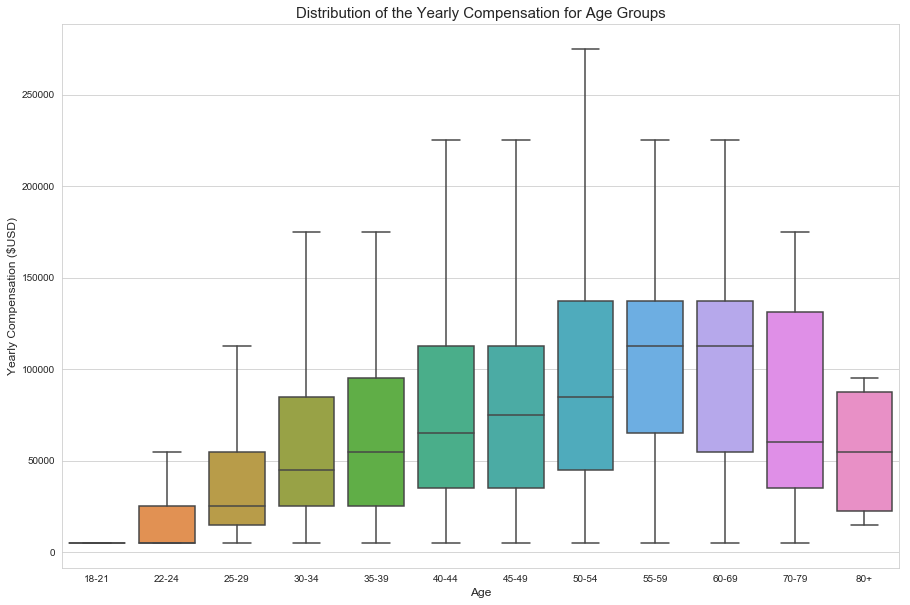

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Q2', y='Yearly Compensation', data=df, order=order, showfliers=False)
plt.ylabel("Yearly Compensation ($USD)", fontsize=12)
plt.xlabel("Age", fontsize=12)
plt.title("Distribution of the Yearly Compensation for Age Groups", fontsize=15)
plt.show()

We can see that people of Age group (18-21) earn less amount or don't earn at all, that is because most of them are either students or reserach assitants. The older you are, the more you earn. Until you retire. Therefore the distribution is understandable.

### 2.3 - Nationality

In [24]:
#Printing the name of question 3 i.e. Residing Country:

print(question['Q3'])

In which country do you currently reside?


Salaries highly vary depending on the country you work in. I regrouped most countries by continent / region, except for the five most represented ones (USA, India, China, Russia and Brazil). Note that Asia means Asia except India, China and Russia; North America is Canada and Mexico only; and that South America does not count Brazil.

In [25]:
country_dic = {'Morocco': 'Africa',
             'Tunisia': 'Africa',
             'Austria': 'Europe',
             'Hong Kong (S.A.R.)': 'Asia',
             'Republic of Korea': 'Asia',
             'Thailand': 'Asia',
             'Czech Republic': 'Europe',
             'Philippines': 'Asia',
             'Romania': 'Europe',
             'Kenya': 'Africa',
             'Finland': 'Europe',
             'Norway': 'Europe',
             'Peru': 'South America',
             'Iran, Islamic Republic of...': 'Middle East',
             'Bangladesh': 'Asia',
             'New Zealand': 'Oceania',
             'Egypt': 'Africa',
             'Chile': 'South America',
             'Belarus': 'Europe',
             'Hungary': 'Europe',
             'Ireland': 'Europe',
             'Belgium': 'Europe',
             'Malaysia': 'Asia',
             'Denmark': 'Europe',
             'Greece': 'Europe',
             'Pakistan': 'Asia',
             'Viet Nam': 'Asia',
             'Argentina': 'South America',
             'Colombia': 'South America',
             'Indonesia': 'Oceania',
             'Portugal': 'Europe',
             'South Africa': 'Africa',
             'South Korea': 'Asia',
             'Switzerland': 'Europe',
             'Sweden': 'Europe',
             'Israel': 'Middle East',
             'Nigeria': 'Africa',
             'Singapore': 'Asia',
             'I do not wish to disclose my location': 'dna',
             'Mexico': 'North America',
             'Ukraine': 'Europe',
             'Netherlands': 'Europe',
             'Turkey': 'Asia',
             'Poland': 'Europe',
             'Australia': 'Oceania',
             'Italy': 'Europe',
             'Spain': 'Europe',
             'Japan': 'Asia',
             'France': 'Europe',
             'Canada': 'North America', 
             'United Kingdom of Great Britain and Northern Ireland': 'Europe',
             'Germany': 'Europe',
             'Brazil': 'South America',
             'Russia': 'Russia',
             'Other': 'Other',
             'China': 'China',
             'India': 'India',
             'United States of America': 'USA'}

In [26]:
df['Q3'] = df['Q3'].apply(lambda x: country_dic[x])

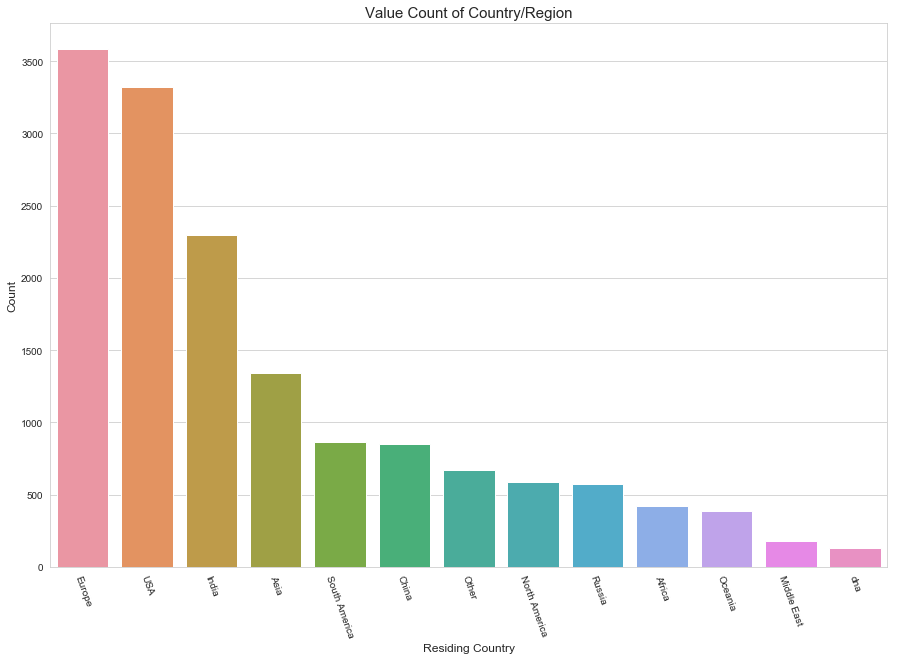

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(df['Q3'], order=df['Q3'].value_counts().index)
plt.xticks(rotation=-70)
plt.xlabel("Residing Country", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Value Count of Country/Region", fontsize=15)
plt.show()

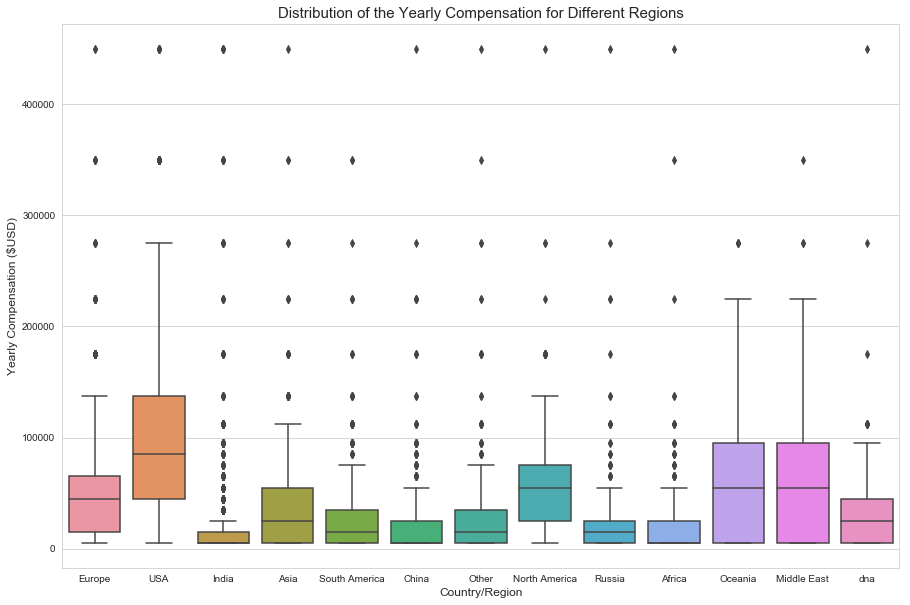

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Q3', y='Yearly Compensation', data=df, order=df['Q3'].value_counts().index)
plt.ylabel("Yearly Compensation ($USD)", fontsize=12)
plt.xlabel("Country/Region", fontsize=12)
plt.title("Distribution of the Yearly Compensation for Different Regions", fontsize=15)
plt.show()

As expected, people from USA, North America, Australia, New Zealand and Middle East tend to earn more than other countries/regions. India, China, Russia, Africa fall almost under the same salary category.

#### Gender wage gap in different countries

In [29]:
#Neglecting the values such as "Prefer not to say" and "Prefer to self-describe".

df1 = df[df['Q1'] != "Prefer not to say"]
df1 = df1[df1['Q1'] != "Prefer to self-describe"]

In the above step, I neglected the values such as "Prefer not to say" and "Prefer to self-describe" because I don't think they contribute any value to our problem.

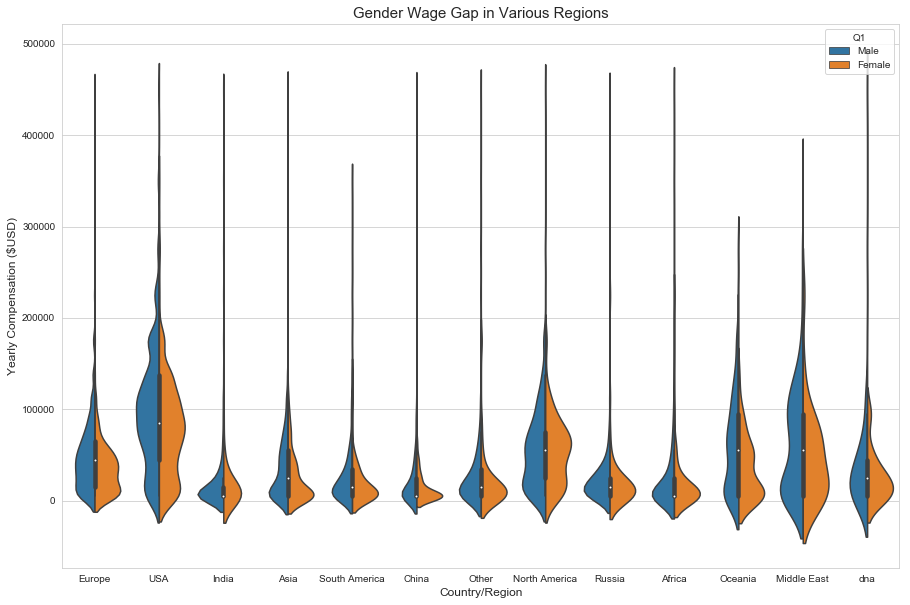

In [30]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q3', y='Yearly Compensation', hue='Q1', data=df1, split=True, order=df['Q3'].value_counts().index,)
plt.ylabel("Yearly Compensation ($USD)", fontsize=12)
plt.xlabel("Country/Region", fontsize=12)
plt.title("Gender Wage Gap in Various Regions", fontsize=15)
plt.show()

The wage gap is clearly visible from the above plot, and appears to be higher in Europe, North America, USA and Middle East than other countries/regions.

### 2.4 - Education

In [31]:
#Printing the name of question 4 i.e. Education Level:

print(question['Q4'])

What is the highest level of formal education that you have attained or plan to attain within the next 2 years?


In [32]:
#To find the value counts of the column Q4:

df['Q4'].value_counts()

Master’s degree                                                      7193
Bachelor’s degree                                                    4321
Doctoral degree                                                      2486
Some college/university study without earning a bachelor’s degree     580
Professional degree                                                   378
No formal education past high school                                  124
I prefer not to answer                                                114
Name: Q4, dtype: int64

Education level is always an important factor when it comes to earning, because the more we study, the higher the pay..... Is that so, let's have a look at the distribution and come to a conclusion.

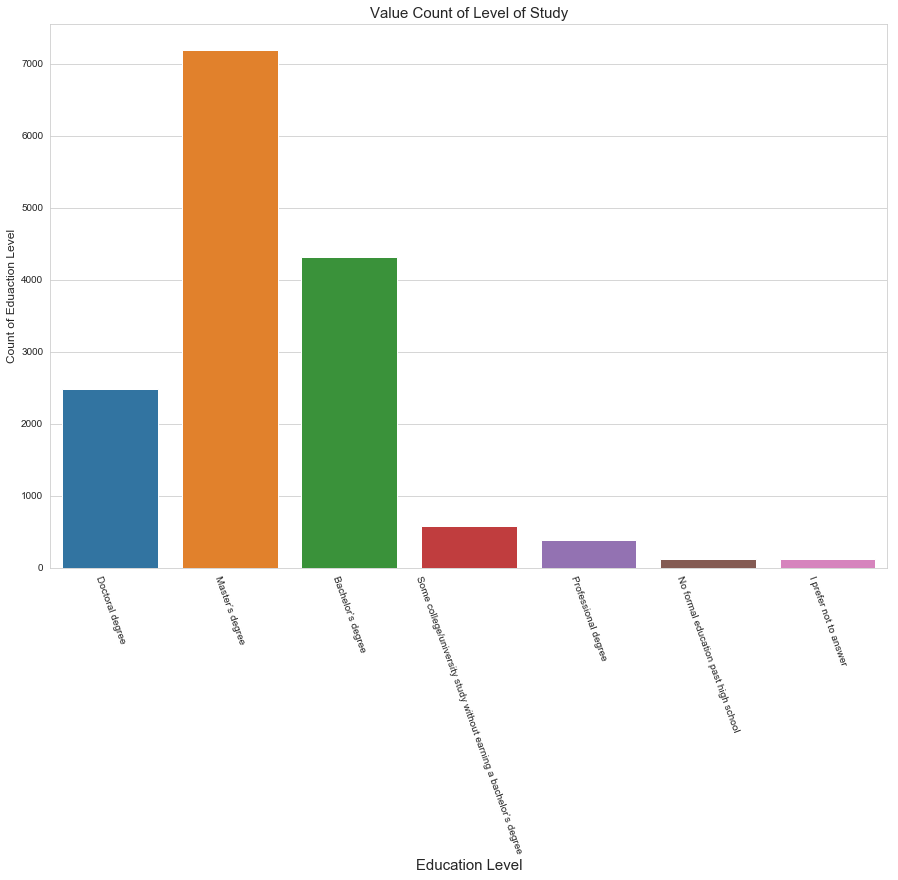

In [33]:
order = ['Doctoral degree', 'Master’s degree', 'Bachelor’s degree',  'Some college/university study without earning a bachelor’s degree',
         'Professional degree', 'No formal education past high school', 'I prefer not to answer']

plt.figure(figsize=(15,10))
sns.countplot(df['Q4'], order=order)
plt.xticks(rotation=-70)
plt.xlabel("Education Level", fontsize=15)
plt.ylabel("Count of Eduaction Level", fontsize=12)
plt.title("Value Count of Level of Study", fontsize=15)
plt.show()

From the plot, we can see that most of the people have done Master's degree.

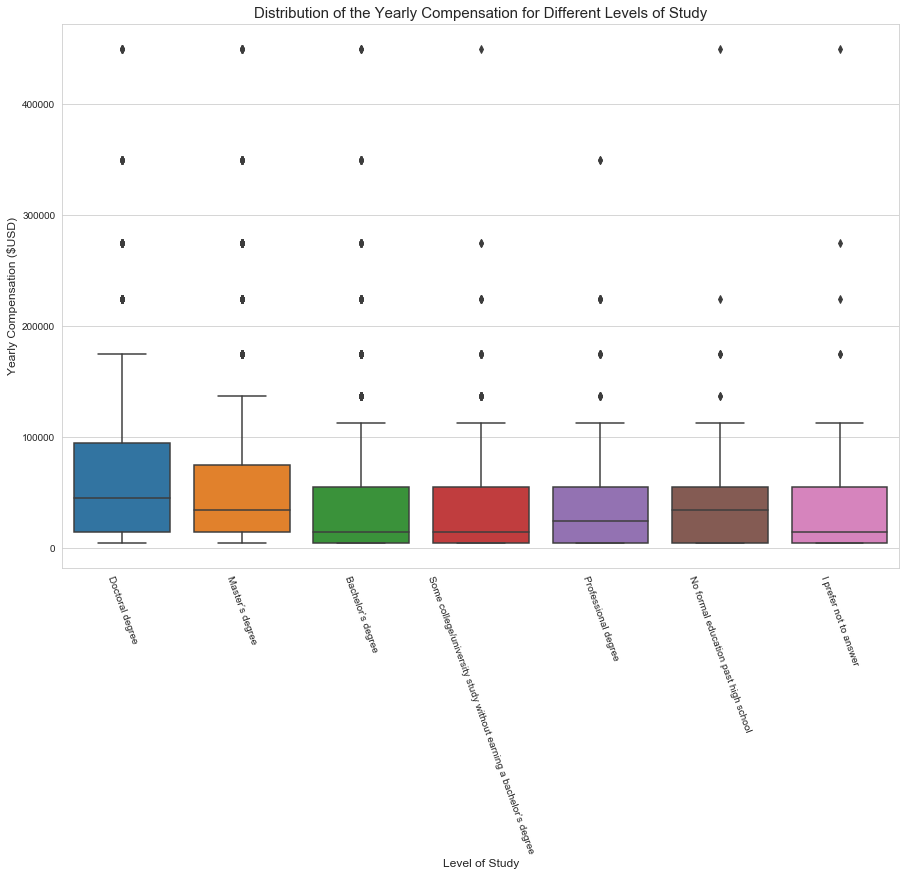

In [34]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Q4', y='Yearly Compensation', data=df, order=order)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Compensation ($USD)", fontsize=12)
plt.xlabel("Level of Study", fontsize=12)
plt.title("Distribution of the Yearly Compensation for Different Levels of Study", fontsize=15)
plt.show()

The more you study, the more you earn ? It is a bit visible here, but it is not very obvious.

### 2.5 - Major

In [35]:
#Printing the name of question 5 i.e. Undergraduate Major:

print(question['Q5'])

Which best describes your undergraduate major? - Selected Choice


It is not easy to determine the income based on specific undergraduate major. Nowadays, there is no big difference between people who majored Computer Science and in Engineering or Mathematics.

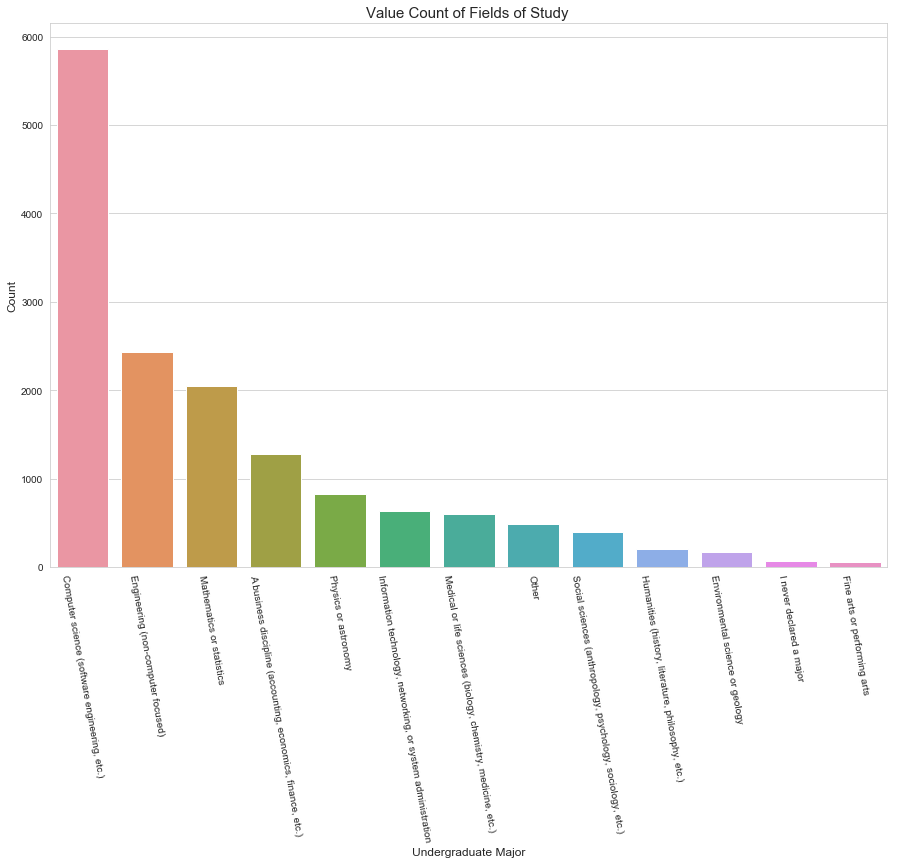

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(df['Q5'], order=df['Q5'].value_counts().index)
plt.xticks(rotation=-80)
plt.xlabel("Undergraduate Major", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Value Count of Fields of Study ", fontsize=15)
plt.show()

It is obvious that Computer science is the most preferred major and then comes Engineering, Mathematics, Accounting and finance.

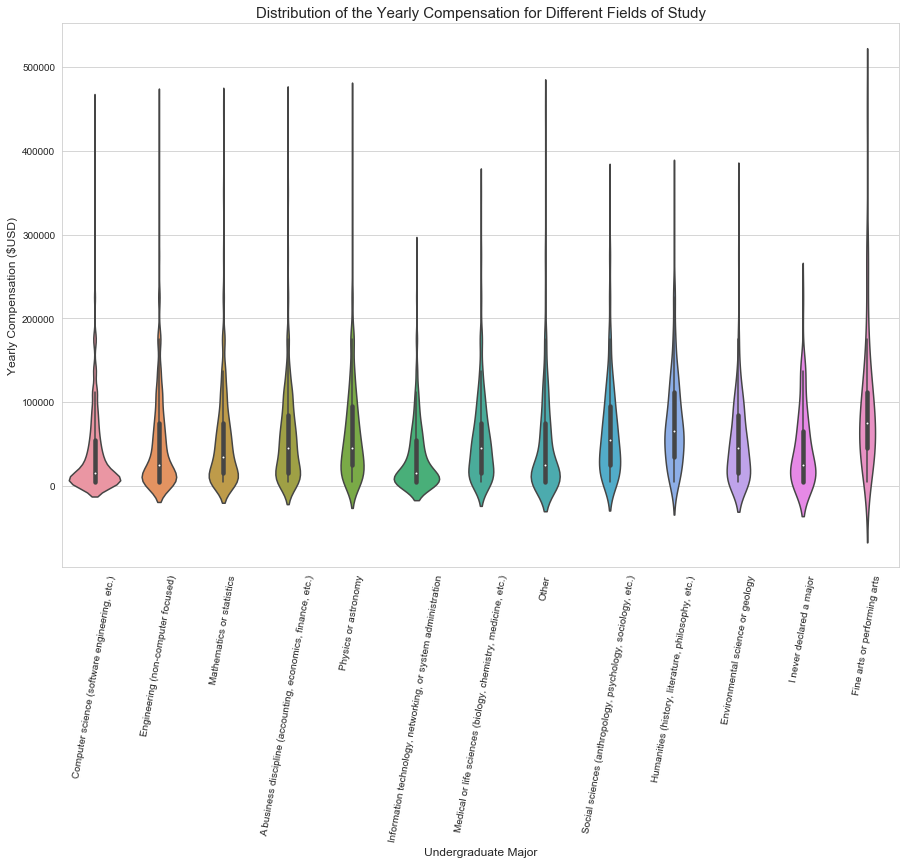

In [37]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q5', y='Yearly Compensation', data=df, order=df['Q5'].value_counts().index)
plt.xticks(rotation=80)
plt.ylabel("Yearly Compensation ($USD)", fontsize=12)
plt.xlabel("Undergraduate Major", fontsize=12)
plt.title("Distribution of the Yearly Compensation for Different Fields of Study", fontsize=15)
plt.show()

As expected, the distributions are very similar, but perhaps I think our model can learn a bit from this. I expect more from the next feature.

### 2.6 - Profession

In [38]:
#Printing the name of question 6 i.e. Profession

print(question['Q6'])

Select the title most similar to your current role (or most recent title if retired): - Selected Choice


Well, I hope profession has to determine the salary!!!! At least little bit!!

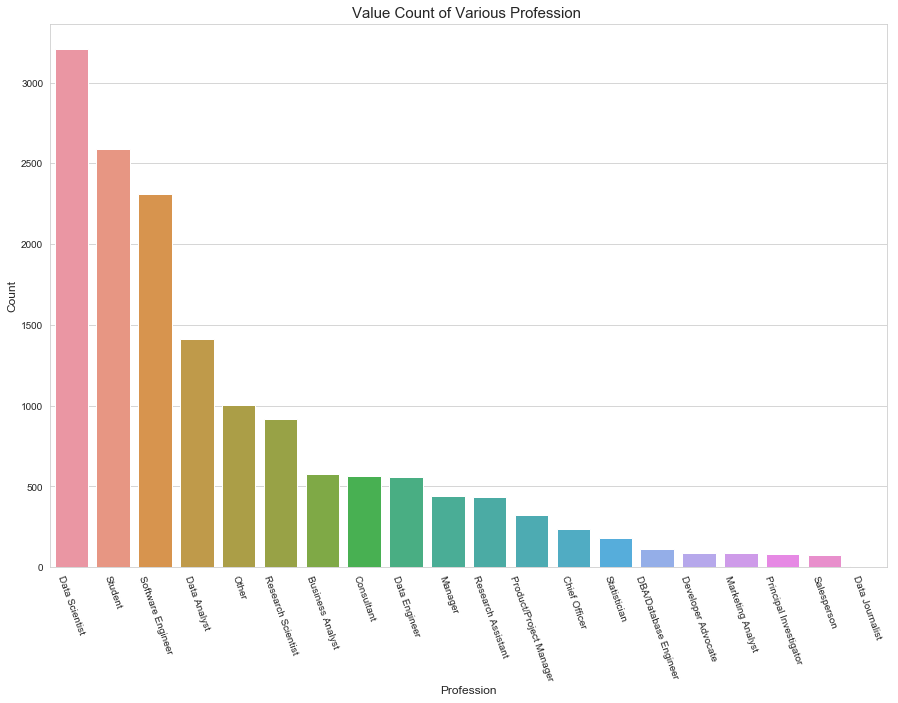

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(df['Q6'], order=df['Q6'].value_counts().index)
plt.xticks(rotation=-70)
plt.xlabel("Profession", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Value Count of Various Profession ", fontsize=15)
plt.show()

Again, this is going to be hard to learn from this, because most jobs are similar. However, students and research assistant are expected to earn less or don't earn at all.

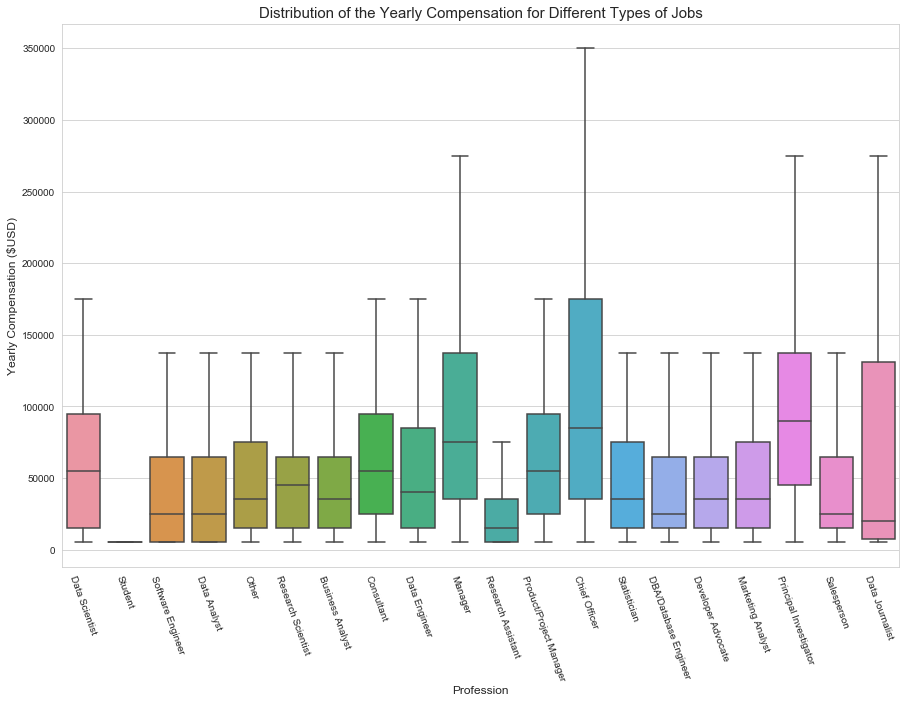

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Q6', y='Yearly Compensation', data=df, order=df['Q6'].value_counts().index, showfliers=False)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Compensation ($USD)", fontsize=12)
plt.xlabel("Profession", fontsize=12)
plt.title("Distribution of the Yearly Compensation for Different Types of Jobs", fontsize=15)
plt.show()

It is obvious that, top earning jobs are Chief Officer, Manager, Principal Investigator and surprisingly Data Journalist as well. I believe these should be jobs held by older people. i.e. >>Age>>Profession>>Salary

### 2.7 - Industry

In [41]:
#Printing the name of question 7 i.e. Industry Name:

print(question['Q7'])

In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice


I guess this is also an important feature because, specific industry pays well i.e. more salary:

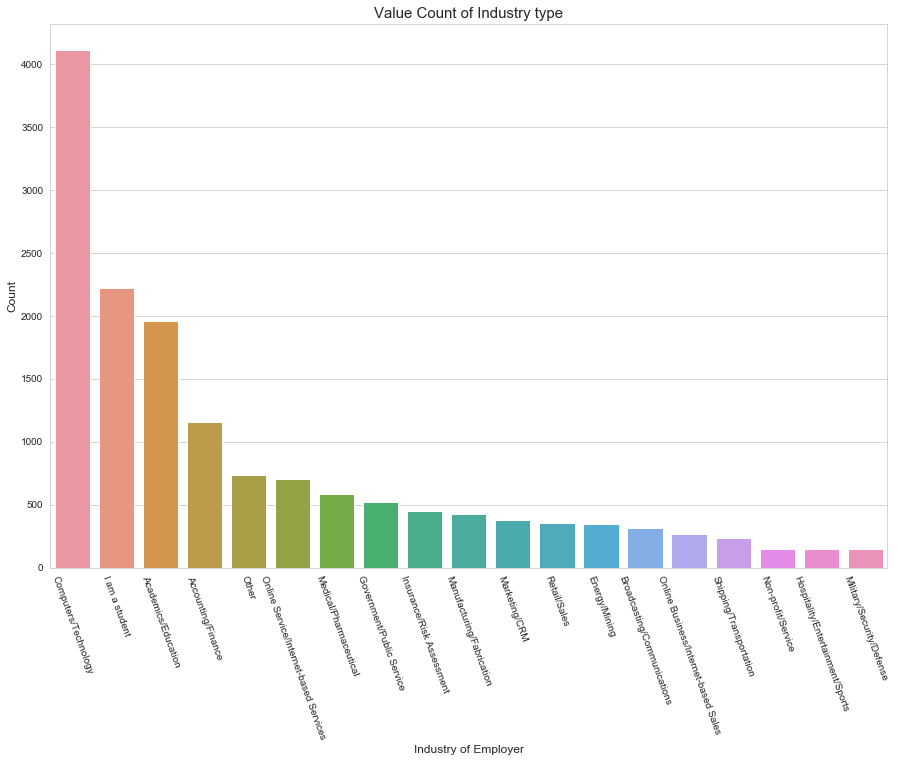

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(df['Q7'], order=df['Q7'].value_counts().index)
plt.xticks(rotation=-70)
plt.xlabel("Industry of Employer", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Value Count of Industry type", fontsize=15)
plt.show()

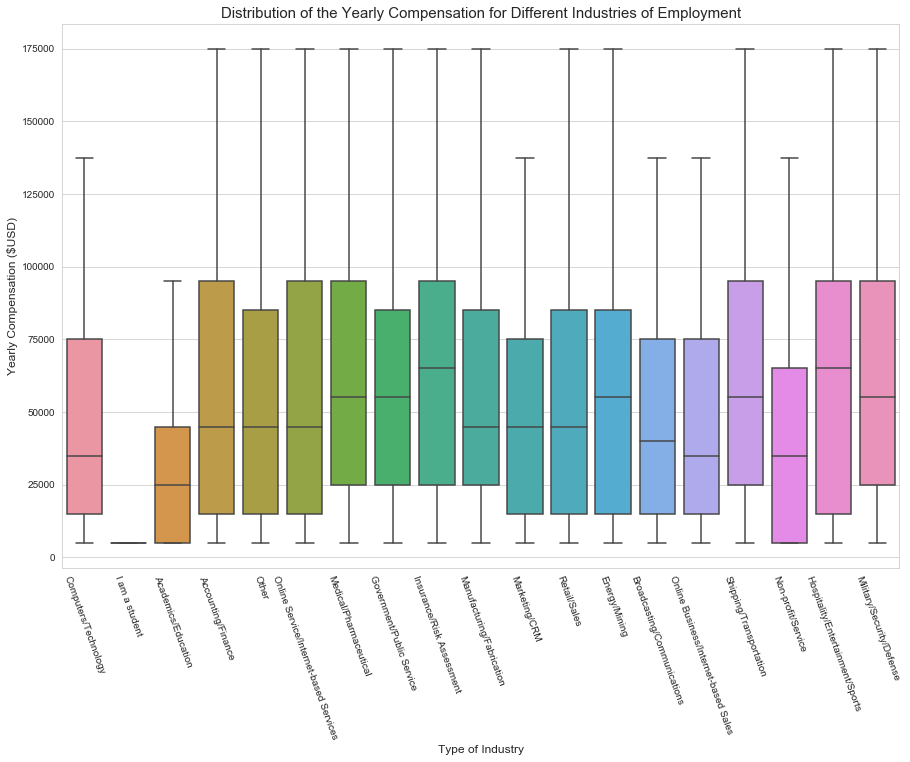

In [43]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Q7', y='Yearly Compensation', data=df, order=df['Q7'].value_counts().index, showfliers=False)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Compensation ($USD)", fontsize=12)
plt.xlabel("Type of Industry", fontsize=12)
plt.title("Distribution of the Yearly Compensation for Different Industries of Employment", fontsize=15)
plt.show()

The three categories that stand out are students *(again, well they're not paid)*, Non-profit/Services and Academics/Education. Nothing incoherent, as those last two are paid by the state.

I was expecting more contrasted results, but a model can definitely learn something from this.

### 2.8 - Experience

In [44]:
#Printing the name of question 8 i.e. Year of Experience:

print(question['Q8'])

How many years of experience do you have in your current role?


It is correlated to age, but I believe it is more precise to predict salary.

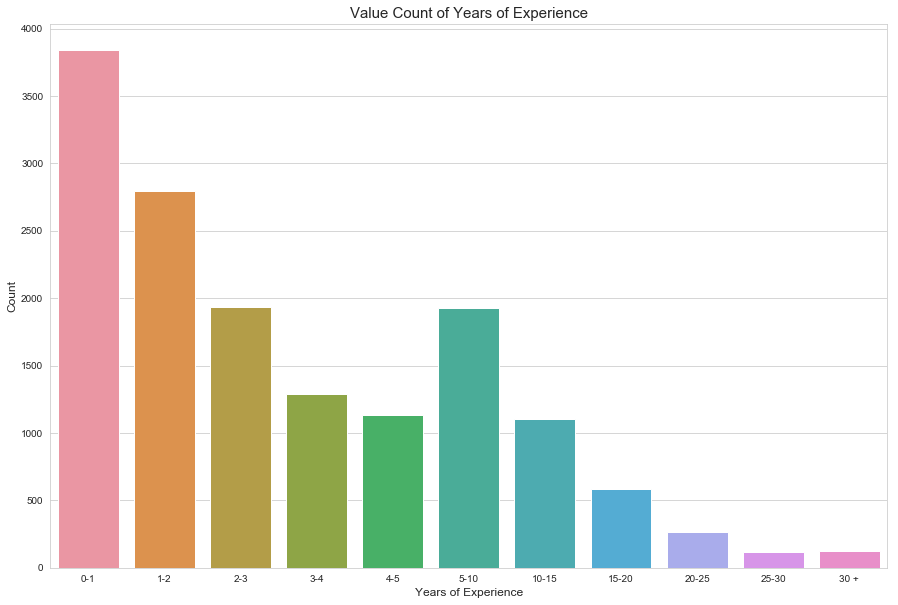

In [45]:
order = ['0-1', '1-2', '2-3',  '3-4', '4-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30 +']

plt.figure(figsize=(15,10))
sns.countplot(df['Q8'], order=order)
plt.xlabel("Years of Experience", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Value Count of Years of Experience", fontsize=15)
plt.show()

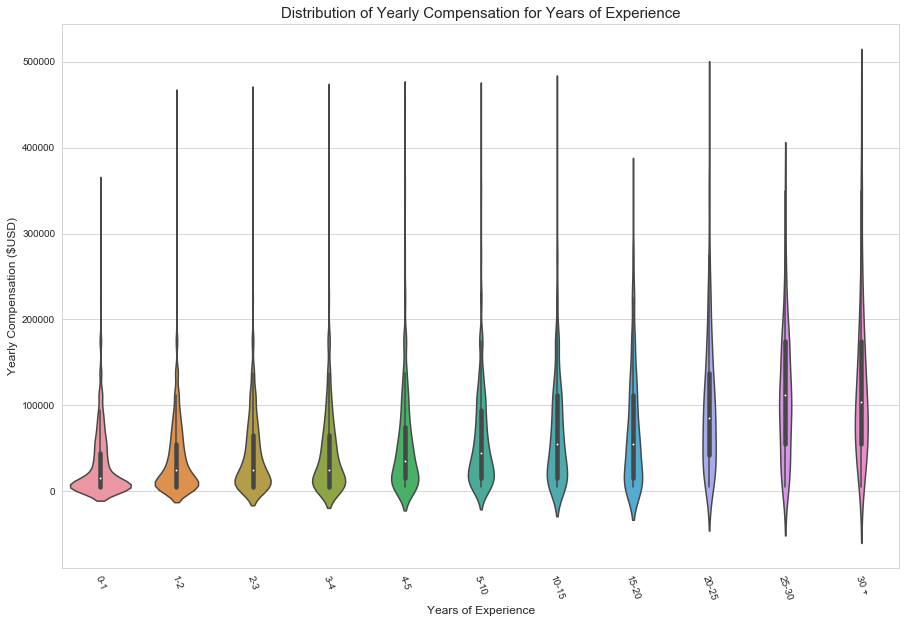

In [46]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Q8', y= 'Yearly Compensation', data=df, order=order)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Compensation ($USD)", fontsize=12)
plt.xlabel("Years of Experience", fontsize=12)
plt.title("Distribution of Yearly Compensation for Years of Experience", fontsize=15)
plt.show()

From the above plot, the results are pretty logical. The Yearly Compensation is a strictly increasing function of Years of experience in the job.

### 2.9 Machine Learning Experience

I am not going to use this feature for modelling, because I feel it is same as years of experience. But I will use it for EDA alone.

In [47]:
#Printing the name of question 25 i.e. Machine Learning Experience

question['Q25']

'For how many years have you used machine learning methods (at work or in school)?'

In [48]:
df['Q25'].value_counts()

< 1 year                                                                 4155
1-2 years                                                                3540
2-3 years                                                                1638
I have never studied machine learning but plan to learn in the future    1210
3-4 years                                                                 907
5-10 years                                                                723
4-5 years                                                                 636
10-15 years                                                               249
20+ years                                                                 120
I have never studied machine learning and I do not plan to                 56
Name: Q25, dtype: int64

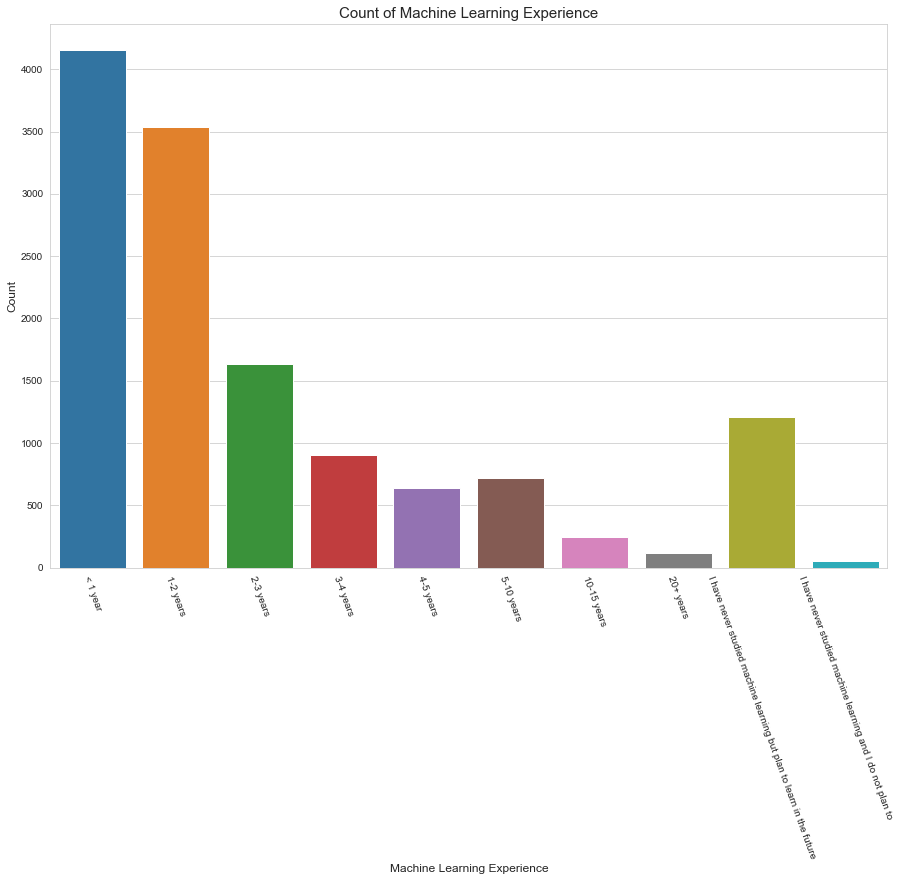

In [49]:
order = ['< 1 year', '1-2 years', '2-3 years',  '3-4 years', '4-5 years', '5-10 years', '10-15 years', '20+ years','I have never studied machine learning but plan to learn in the future','I have never studied machine learning and I do not plan to']

plt.figure(figsize=(15,10))
sns.countplot(df['Q25'], order=order)
plt.xticks(rotation=-70)
plt.xlabel("Machine Learning Experience", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count of Machine Learning Experience", fontsize=15)
plt.show()

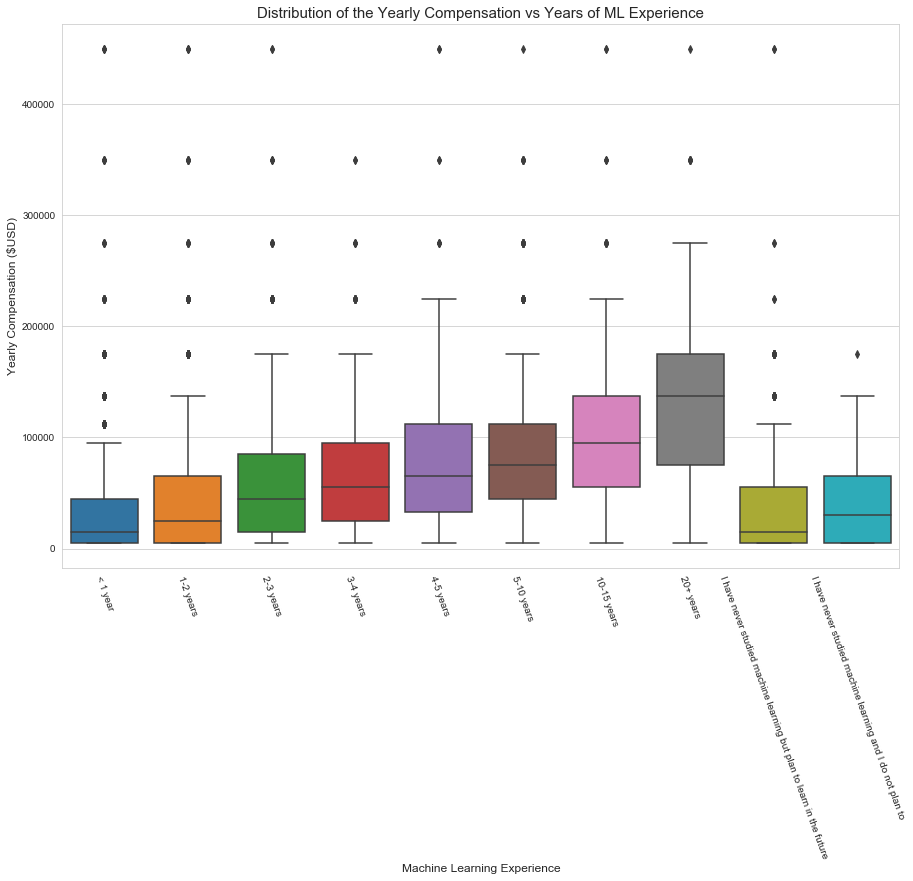

In [50]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Q25', y='Yearly Compensation', data=df, order=order)
plt.xticks(rotation=-70)
plt.ylabel("Yearly Compensation ($USD)", fontsize=12)
plt.xlabel("Machine Learning Experience", fontsize=12)
plt.title("Distribution of the Yearly Compensation vs Years of ML Experience", fontsize=15)
plt.show()

# 3. FEATURE SELECTION

Feature selection is very important in machine learning because it serves as a fundamental technique to pick the most efficient variables that can be used to predict the target. Adding to that is the reduction of the curse of dimensionality or help deal with overfitting. This will eventually help in a lean and efficient model that can be deployed in production efficiently. Further, accurate feature set corresponds to the best bias-variance tradeoff point for the learning algorithm.

### 3.1 - Input data

In [51]:
features = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8"] #Separating my selected list of columns alone for feature extraction.
target = ["Yearly Compensation"] #Separating the target varibale.

df_new = df[features + target] # Creating a new dataframe with the selected features alone.

df_new = df_new.fillna('?') 

In [52]:
df_new

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Yearly Compensation
1,Male,30-34,Oceania,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,15000
2,Female,30-34,USA,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,5000
3,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,5000
4,Male,35-39,South America,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,15000
5,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,5000
6,Male,30-34,Europe,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,25000
7,Male,40-44,USA,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,5-10,137500
8,Male,25-29,Europe,Doctoral degree,Mathematics or statistics,Student,I am a student,?,35000
9,Male,25-29,USA,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,1-2,35000
10,Female,25-29,South America,Bachelor’s degree,"A business discipline (accounting, economics, ...",Data Analyst,Other,1-2,15000


Justification for choosing these columns/features alone:

* Q1 Gender : Gender somehow has certain correlation with the yearly compensation.

* Q2 Age : It plays a vital role in determining salary.

- Q3 Country : Its obvious, different country have different level of salary.

- Q4 Level of Education : For sure, education level does matter for salary.
- Q5 Major : The undergraduate major does have some correlation with the salary.
- Q6 Profession : From EDA, different professions have different salaries, so it can be considered.
- Q7 Industry of current Employer : Certain Industries pay different levels of salaries, and thus it can be considered as well. 
- Q8 Experience in Years : Ofcourse, experience is an important feature.
- Q9 Yearly Compensation in $USD : It is our target column.

In order to make sure our classifier to understand the data, we must categorize it. However, Age and Experience have a logical order that we need to keep. I took the average of each interval as the feature, to make it understandable for our model.

In [53]:
dic_age = {'30-34': 32, '22-24': 23, '35-39': 37, '18-21': 19.5, '40-44': 42, '25-29': 27, '55-59': 57, '60-69': 64.5, '45-49': 47, '50-54': 52, '70-79': 74.5, '80+': 80}
dic_exp = {'5-10': 7.5, '0-1': 0.5, '10-15': 12.5, '3-4': 3.5, '1-2': 1.5, '2-3': 2.5, '15-20': 17.5, '4-5': 4.5, '25-30': 27.5, '20-25': 22.5, '30 +': 30, '?': 0}


df_new['Q2'] = df_new['Q2'].apply(lambda x: dic_age[x])
df_new['Q8'] = df_new['Q8'].apply(lambda x: dic_exp[x])


for q in ["Q1", "Q3", "Q4", "Q5", "Q6", "Q7"]: # Converting the column datatype to category using astype() method.
    df_new[q] = df_new[q].astype('category')
    
cat_columns = df_new.select_dtypes(['category']).columns
df_new[cat_columns] = df_new[cat_columns].apply(lambda x: x.cat.codes)

Renaming our columns for better feature understanding.

In [54]:
df_new = df_new.rename(index=str, columns={"Q1": 'Sex', "Q2": 'Age', "Q3": 'Country', "Q4": 'Education', "Q5": 'Major', "Q6": 'Profession', "Q7": 'Industry', "Q8": 'Experience'})

### 3.2 - Target
Here we have to predict the income category in USD. Since the problem seems to be a multiclass classification problem. We need to create classes for our target column.

Therefore I make 6 categories : 

- 0-10,000
- 10,000 - 30,000
- 30,000 - 50,000
- 50,000 - 80,000
- 80,000 - 125,000
- Above 125,000

In [55]:
classes = ['0-10,000', '10,000 - 30,000', '30,000 - 50,000', '50,000 - 80,000', '80,000 - 125,000', '> 125,000']

In [56]:
dic_target = {5000: 0,  
              15000: 1, 25000: 1, 
              35000: 2, 45000: 2, 
              55000: 3,  65000: 3,  75000: 3,
              85000: 4, 95000: 4, 112500: 4,
              137500: 5,  175000: 5, 225000: 5, 275000: 5, 350000: 5,  450000: 5
             }

df_new['Yearly Compensation'] = df_new['Yearly Compensation'].apply(lambda x: dic_target[x])

I mapped my classes into 6 categories i.e. (0,1,2,3,4,5), which makes it easier for the model to predict the yearly compensation.

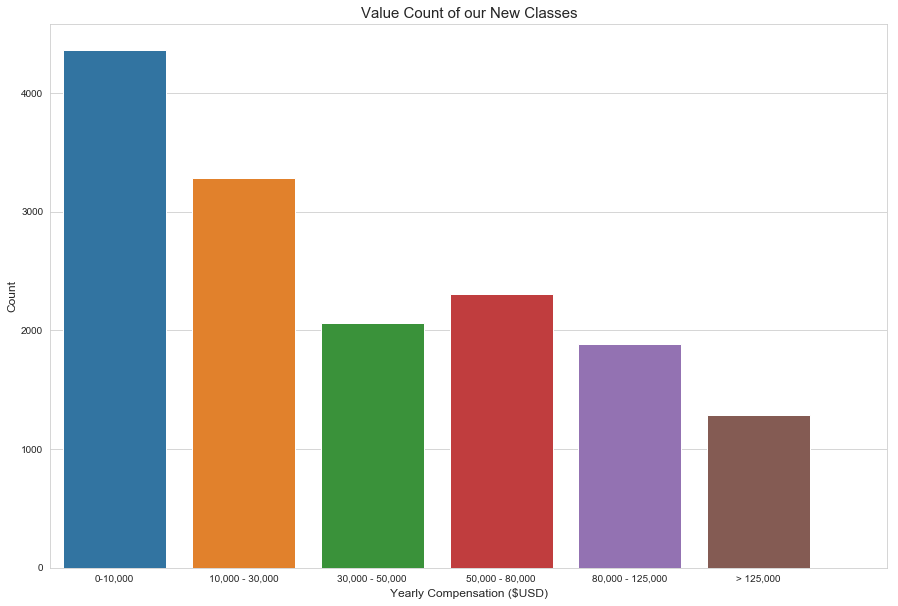

In [57]:
plt.figure(figsize=(15,10))
sns.countplot(df_new['Yearly Compensation'])
plt.xticks(range(0, 7), classes)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Yearly Compensation ($USD)", fontsize=12)
plt.title("Value Count of our New Classes", fontsize=15)
plt.show()

### Using Correlation plot


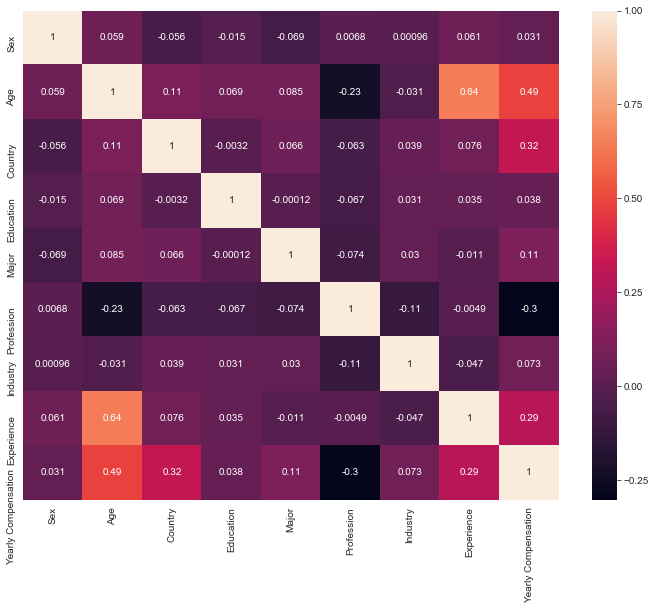

In [58]:
corrmat = df_new.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot = True);

From the above correlation plot we can see that, all our selected features have positive and really good correaltion values.

In [59]:
df_new.shape

(15196, 9)

In [60]:
df_new.head()

,Sex,Age,Country,Education,Major,Profession,Industry,Experience,Yearly Compensation
1,1,32.0,7,0,3,11,9,7.5,1
2,0,32.0,11,3,2,7,7,0.5,0
3,1,23.0,4,3,9,4,7,0.5,0
4,1,37.0,10,1,8,11,0,12.5,1
5,1,19.5,4,3,8,11,16,0.5,0


Here, I used pd.get_dummies() to create dummy variables of the categorical columns from our dataset. It produces similar results as OneHot encoder(). Since it converts it into binary values which makes the classification easier for our model.

In [61]:
#Creating dummy variables for the various categorical columns
a = pd.get_dummies(df_new['Sex'] , drop_first=True, prefix = 'Sex')
b = pd.get_dummies(df_new['Age'] , drop_first=True,prefix = 'Age')
c = pd.get_dummies(df_new['Country'] , drop_first=True,prefix = 'Country')
d = pd.get_dummies(df_new['Education'] , drop_first=True,prefix = 'Education')
e = pd.get_dummies(df_new['Major'] , drop_first=True,prefix = 'Major')
f = pd.get_dummies(df_new['Profession'] , drop_first=True,prefix = 'Profession')
g = pd.get_dummies(df_new['Industry'] , drop_first=True,prefix = 'Industry')
h = pd.get_dummies(df_new['Experience'] , drop_first=True,prefix = 'Experience')
i = df_new['Yearly Compensation']
#Creating the final dataframe of features
df_new = pd.concat([a,b,c,d,e,f,g,h,i] , axis = 1)

Let's have a look at our final dataframe after all data cleaning processes.

In [62]:
df_new.head()

,Sex_1,Age_23.0,Age_27.0,Age_32.0,Age_37.0,Age_42.0,Age_47.0,Age_52.0,Age_57.0,Age_64.5,...,Experience_2.5,Experience_3.5,Experience_4.5,Experience_7.5,Experience_12.5,Experience_17.5,Experience_22.5,Experience_27.5,Experience_30.0,Yearly Compensation
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting our data to perform feature extraction

In [63]:
from sklearn.model_selection import train_test_split

X = df_new.drop('Yearly Compensation' , axis = 1)
y = df_new['Yearly Compensation']

   Reason why I chose SelectFromModel using RandomForestClassifier():
    
   The random forest algorithm is one of the most popular methods used for features selection. The tree-based models are naturally capable of identifying the important variables as they select the variables for classification based on how well they improve the purity of the node. That is why the final output is an ordered list of variables by importance.

In [64]:
#Importing the feature selection function 
from sklearn.feature_selection import SelectFromModel
#Importing the random forest regressor
from sklearn.ensemble import RandomForestClassifier

#Initialising the random forest regressor 
rfc = RandomForestClassifier(random_state = 101)

#Initialising the feature selector
feat = SelectFromModel(rfc)
#Fitting the data
feat.fit(X,y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=101, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

Here, I used get_support() method which selects the retained features from the selected features. 

In [65]:
#Extracting the selected feature names
select_feat = X.columns[(feat.get_support())]

#Counting the number of features before and after Feature Selection
print('The number of features before feature selection is :', len(X.columns))
print('------------------------------------------------------------------------------')
print('The number of features after feature selection is :', len(select_feat))

The number of features before feature selection is : 91
------------------------------------------------------------------------------
The number of features after feature selection is : 34


In [66]:
#Printing the selected feature to see what are the features we have extracted from our dataset.

select_feat

Index(['Sex_1', 'Age_23.0', 'Age_27.0', 'Age_32.0', 'Age_37.0', 'Country_3',
       'Country_4', 'Country_11', 'Education_1', 'Education_3', 'Major_1',
       'Major_2', 'Major_3', 'Major_9', 'Major_12', 'Profession_4',
       'Profession_7', 'Profession_11', 'Profession_15', 'Profession_17',
       'Profession_19', 'Industry_1', 'Industry_3', 'Industry_7',
       'Industry_11', 'Industry_15', 'Industry_16', 'Experience_0.5',
       'Experience_1.5', 'Experience_2.5', 'Experience_3.5', 'Experience_4.5',
       'Experience_7.5', 'Experience_12.5'],
      dtype='object')

In [67]:
#Extracting the selected features separately and formed a new dataframe with the selected features alone: 

X_new = X.loc[:,list(select_feat.values)]

In [68]:
X_new.head()

,Sex_1,Age_23.0,Age_27.0,Age_32.0,Age_37.0,Country_3,Country_4,Country_11,Education_1,Education_3,...,Industry_11,Industry_15,Industry_16,Experience_0.5,Experience_1.5,Experience_2.5,Experience_3.5,Experience_4.5,Experience_7.5,Experience_12.5
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0


# 4. MODEL IMPLEMENTATION

Here, I created a function which helps us to visualize the accuracy of our model. It plots the mean value of the scores of our chosen estimator for given two datasets, and a coloured band region around the line, that is, the interval (mean - standard deviation, mean + standard deviation).(Referred from the tutorial code)


plot_learning_curve() uses in turn the function sklearn.learning_curve.learning_curve(), which determines cross-validated training and test scores for different training set sizes. An (optional) cross-validation generator splits the given dataset k times in training and test data. Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. The scores are averaged over all k runs for each training subset size. Here, I will be using 10 folds for our cross validation scores.

In [69]:
#Referred from the tutorial part.

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=10, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

### Spliting the final data into train and test

Lets build a model for the given data. First, lets split the training set into a training and validation set, with a 70%-30% split. We do this with the sklearn's train_test_split function.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.30 ,random_state=0, shuffle = True)

### Rescaling values
Having features that have different scales can cause problems in some machine learning models since a lot of the models are based on the concept of Euclidean Distances. This means that features with greater scales would have a greater impact on the solution, then those of smaller values.We can rectify this situation my scaling the independent values. This can be done with the scaler function. There are different types of scalar functions available such as MinMaxScalar, StandardScalar and so on. But here, I will be using the StandardScalar() for our model, which will standardize the features by removing the mean and scaling to unit variance.

In [71]:
from sklearn.preprocessing import StandardScaler #Importing StandardScalar from sklearn
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Finally we can create and fit a model!!

Now, we can train and fit a model to the training set we created above.

In [72]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Model Validation

We can now use the model that we created to make predictions on the testing set we created earlier.

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error


lg_pred = lg.predict(X_test)

ACC = accuracy_score(y_test,lg_pred)
mse = mean_squared_error(y_test,lg_pred)

print ("Accuracy of our model is {}% on the testing set".format(round(ACC*100,2))) 
print ("Mean Squared Error of our model is {}% on the testing set".format(round(mse)))

Accuracy of our model is 46.28% on the testing set
Mean Squared Error of our model is 2.0% on the testing set


In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lg_pred)
cm

array([[1004,  275,   12,   31,   13,    3],
       [ 304,  472,   47,   97,   30,   12],
       [ 115,  228,   90,  106,   42,   12],
       [  78,  208,   68,  179,  125,   30],
       [  45,   97,   28,  112,  185,  108],
       [  22,   43,    9,   36,  113,  180]], dtype=int64)

In [75]:
from sklearn.metrics import classification_report
cl = classification_report(y_test,lg_pred)
print(cl)

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1338
           1       0.36      0.49      0.41       962
           2       0.35      0.15      0.21       593
           3       0.32      0.26      0.29       688
           4       0.36      0.32      0.34       575
           5       0.52      0.45      0.48       403

   micro avg       0.46      0.46      0.46      4559
   macro avg       0.43      0.40      0.40      4559
weighted avg       0.45      0.46      0.45      4559



From the above results, we can see that our model gets an accuracy score of 46.28% on the test set. It is clearly evident that our model is suffering from underfitting. We shall discuss about it later in the bias-variance trade off.

   Here, from the classification report we can see that the accuracy_score is same as F1 score for our model. Since F1 score calculates the total False Negatives and False Positives, it is considered to be crucial for a model than accuracy_score. Moreover, F1-score is a better metric when there are imbalanced classes as in our case.
  

### Model Evaluation using Cross Validation

The above method of training and testing a model doesn't really show how well the model performs. When building a model, we want one that can generalize (low bias), and have similar accuracies across testing sets (low variance). However, we are lacking training and testing data.

A better method than the above for validating a model is to use cross-validation. In cross-validation, we partition the training set into various training and testing sets and we use these sets to train and test the model multiple times.

Here, I will be using the most common method i.e, KFold Cross Validation where the training set is split into k equal sizes. It splits the data into k subsamples, a single sample is used for testing, and the remaining k-1 samples are used for training. This process continues k times, and each time a different sample is used for testing. This results in each sample being tested once. At the end of this we get 10 accuracies for the model and, from this, we can get the average accuracy, and the standard deviation of the accuracy. The higher the average accuracy, the lower the bias. The lower the standard deviation, the lower the variance. This better represents the true performance of the model on the training set.

In [76]:
#Code modified from Logistic Regression tutorial part.

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

lg = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_new)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X_new):
    X_train, X_test = X_new.values[train_idx], X_new.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    lg.fit(X_train, y_train)
    
    lg_pred = lg.predict(X_test)
    
    ACC = accuracy_score(y_test,lg_pred)
    mse = mean_squared_error(y_test,lg_pred)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3))) 
    print ("Fold {}: Mean Squared Error: {}%".format(np_idx, round(mse,3))) 

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))
print ("Average Error: {}%".format(round(np.mean(mse),3)))

Fold 1: Accuracy: 0.518%
Fold 1: Mean Squared Error: 1.526%
Fold 2: Accuracy: 0.414%
Fold 2: Mean Squared Error: 1.907%
Fold 3: Accuracy: 0.405%
Fold 3: Mean Squared Error: 2.222%
Fold 4: Accuracy: 0.459%
Fold 4: Mean Squared Error: 1.662%
Fold 5: Accuracy: 0.454%
Fold 5: Mean Squared Error: 2.069%
Fold 6: Accuracy: 0.391%
Fold 6: Mean Squared Error: 2.35%
Fold 7: Accuracy: 0.446%
Fold 7: Mean Squared Error: 1.872%
Fold 8: Accuracy: 0.483%
Fold 8: Mean Squared Error: 2.014%
Fold 9: Accuracy: 0.462%
Fold 9: Mean Squared Error: 1.825%
Fold 10: Accuracy: 0.499%
Fold 10: Mean Squared Error: 1.762%
Average Score: 45.315%(3.877%)
Average Error: 1.762%


From the above results, it is obvious that the accuracy would decrease slightly when performing cross validation. The average accuracy of our model was found to be 45.315% with a variance of 3.877%. 

<module 'matplotlib.pyplot' from 'C:\\Users\\krish\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

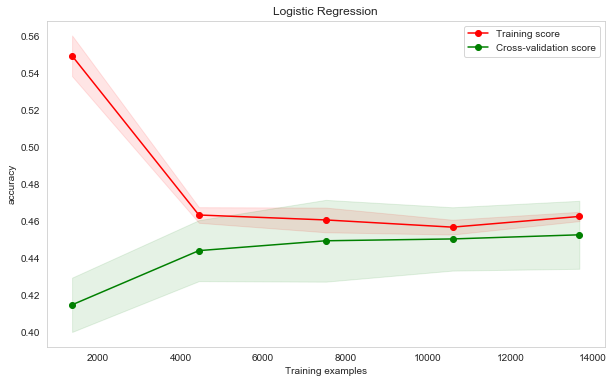

In [77]:
from sklearn.model_selection import learning_curve

plot_learning_curve(lg,'Logistic Regression', X_new, y, cv=10)

## BIAS - VARIANCE Trade Off

From the above learning curve, it is evident that our model is highly biased i.e, the model is suffering from underfitting. We could see that the distance between the training curve and cross validation curve is very less which inturn suggests that our model has very low variance. Both the training and cross validation curves becomes a plateau after certain number of training samples. The training curve and the cross validation curve ends up close to each other because we have few parameters and so much data.

That is, If the selected features are few and the number of data is more, then the model produces similar results for training and cross validation. The major issue with high bias is that the model will suffer from high error rate on both the training and cross validation.

One more important inference, if a learning algorithm suffers from high bias, increasing the training data will not improve its accuracy.

Remedies for reducing the bias:

- Refine the hyperparameters with a larger grid to search.
- Does require more features engineering.
- Handle missing values carefully.


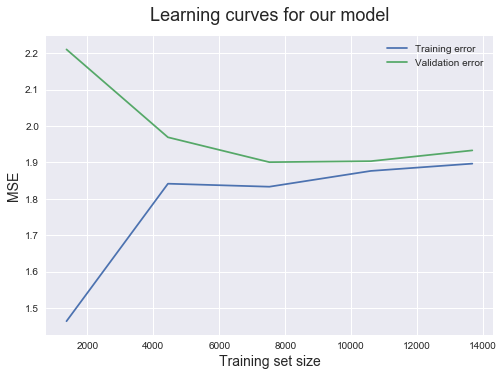

In [78]:
train_sizes, train_scores, validation_scores = learning_curve(lg, X_new ,y, train_sizes = np.linspace(.1, 1.0, 5), cv = 10,
scoring = 'neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for our model', fontsize = 18, y = 1.03)
plt.legend()

The above graph is same as the learning curve, but here I used error metric instead of accuracy.

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
# The degree step to use
steps = np.arange(1,10,1)

# Storage vectors to store the training and testing accuracy and error
trainErr = np.zeros(steps.shape)
testErr = np.zeros(steps.shape)
trainAcc = np.zeros(steps.shape)
testAcc = np.zeros(steps.shape)    
# Create model instance
model = LogisticRegression(random_state=101)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
    
# Train model
model.fit(X_train, y_train)
    
# Make Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
    
# Calculate Accuracy
trainAcc[i] = accuracy_score(y_train, y_train_pred)
testAcc[i] = accuracy_score(y_test, y_test_pred)
    
# Calculate Error
trainErr[i] = mean_squared_error(y_train, y_train_pred)
testErr[i] = mean_squared_error(y_test, y_test_pred)

(1, 8)

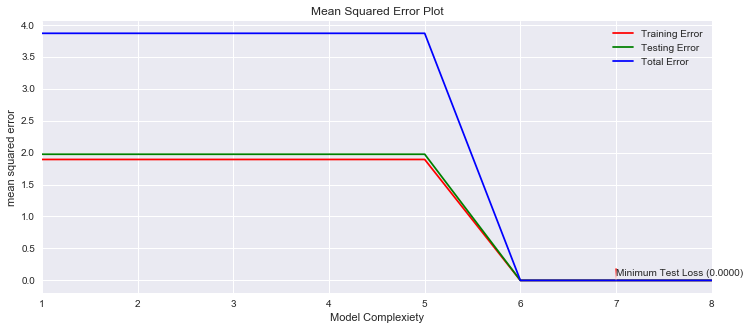

In [80]:
plt.figure(figsize=(12,5))


plt.plot(trainErr,'r',label='Training Error')
plt.plot(testErr,'g',label='Testing Error')
plt.plot(trainErr + testErr, 'b', label='Total Error')

test_loss_min = testErr.min()
deg_min = testErr.argmin() + steps[0]

#Annotate the plot:plt.annotate(text,pointing coordinates,text coordinates,arrowproperty={})
plt.annotate('Minimum Test Loss (%.4f)' % test_loss_min,xy=(deg_min,test_loss_min),xytext=(deg_min,test_loss_min+0.08),arrowprops=dict(width=1,headwidth=2,facecolor='r',shrink=0.05))

plt.title("Mean Squared Error Plot")
plt.xlabel("Model Complexiety")
plt.ylabel("mean squared error")
plt.legend(loc=1)
plt.xlim(1,steps[-2])

From the above plot, we can infer that the model initially has same error rate for both training and test set unitll number of degrees equals 5. After 5 degree of freedom, the error rates for both of them decreases steeply which states the model is underfitting. When the model complexity exceeds 6 degrees, the model gets an error rate of 0 which proves the model overfits.

# 5.MODEL TUNING

Hyperparameter tuning using Grid Search is one of the most common methods used for model optimisation. Grid search just builds several models with all the parameter combinations specified, and runs cross validation to return the set of parameters that had the highest cv score on the validation set.

There are various types of searching methods:

    1) Grid Search - The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

    2) Randomized Search - RandomizedSearchCV implements a “fit” and a “score” method. In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions.
    
But here, I will be using GridSearch for our model over the parameter grid.

In [81]:
# Creating regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [82]:
from sklearn.model_selection import GridSearchCV
gridcv = GridSearchCV(lg, hyperparameters, cv=10, verbose=0)

model = gridcv.fit(X_new, y)

print('Best Penalty:',model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 7.742636826811269


# TESTING AND DISCUSSION

Let's check the accuracy of our model using the optimal values obtained from hyperparameter tuning.

### Testing our Optimal Model:

In [83]:
lg = LogisticRegression(penalty = 'l1',C = 2.7825594022071245, fit_intercept= True, random_state=101)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
lg.fit(X_train,y_train)

LogisticRegression(C=2.7825594022071245, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=101,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [84]:
lg_pred = lg.predict(X_test)

acc_lg = accuracy_score(y_test,lg_pred)
f1_lg = f1_score(y_test,lg_pred, average='micro')

print ("Accuracy Score of our model after hypertuning is {}% on the testing set".format(round(acc_lg*100,2))) 
print ("F1 Score of our model after hypertuning is {}% on the testing set".format(round(f1_lg*100,2)))   

Accuracy Score of our model after hypertuning is 47.2% on the testing set
F1 Score of our model after hypertuning is 47.2% on the testing set


In [85]:
report = classification_report(y_test,lg_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       626
           1       0.38      0.45      0.41       372
           2       0.41      0.04      0.07       195
           3       0.23      0.52      0.32       172
           4       0.21      0.13      0.16        97
           5       0.23      0.28      0.25        57

   micro avg       0.47      0.47      0.47      1519
   macro avg       0.37      0.35      0.32      1519
weighted avg       0.52      0.47      0.46      1519



The F1 score of our model was increased from 46.28% to 47.2% i.e., increased by almost 1% after tuning the hyperparameters of our model.

### Discussion

Here from the above results, we can see that our F1 score of the test data is more than that of the training data which is a positive outcome from our model. Eventhough the accuracy increases, our model is still highly biased. 


In [86]:
a=pd.DataFrame(y_test) #Converting  y_test into a dataframe
b=pd.DataFrame(lg_pred) #Converting predicted values into a dataframe

plot_dist = pd.concat([a,b], axis = 1)

plot_dist.columns = ['True', 'Predicted']
plot_dist.head()

,True,Predicted
0,0,0
1,0,0
2,5,5
3,0,0
4,4,3


Text(0, 0.5, 'Distribution')

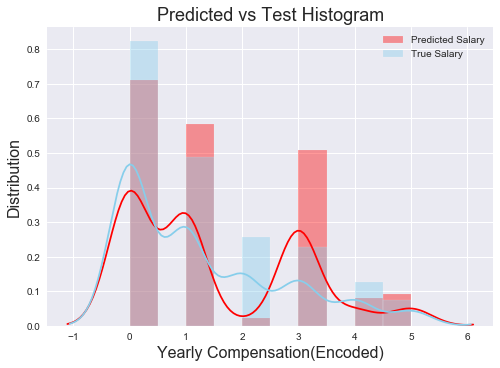

In [87]:
#Plotting the distribution of our predicted value over test value.

font_size=16
label_size=12
sns.distplot( plot_dist["Predicted"], bins=10,  color="red",label='Predicted Salary')
ax=sns.distplot( plot_dist["True"], bins=10, color="skyblue",label='True Salary')
plt.legend()
ax.axes.set_title('Predicted vs Test Histogram',fontsize=font_size+2)
ax.set_xlabel('Yearly Compensation(Encoded)',fontsize=font_size)
ax.set_ylabel('Distribution',fontsize=font_size)

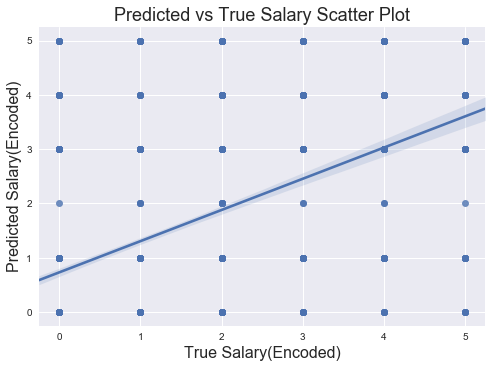

In [88]:
ax = sns.regplot(x="True", y="Predicted", data=plot_dist)
font_size=16
label_size=12
ax.axes.set_title('Predicted vs True Salary Scatter Plot',fontsize=font_size+2);
ax.set_xlabel('True Salary(Encoded)',fontsize=font_size);
ax.set_ylabel('Predicted Salary(Encoded)',fontsize=font_size);

### The Overall fit of our model:

I would say our model suffers from Underfitting!!!

Underfitting, counterpart of overfitting, which happens when the model complexity is not enough to capture the relationship between the dataset’s features and  target variable. A straight line in the above graph shows that the model was not able to capture the relationship between the features and target variable. Therefore, the model’s outcome is not accurate when applied to new data, especially when x values in the new data are much larger or smaller than those in the training data.

Effective ways to avoid Underfitting:

    -By increasing the model complexity.

    -Data preprocessing must be altered.
    
    -Better utilisation of other text fields that was dropped to make data set simpler.

    -Adding extra relevant features to the model i.e, Feature Engineering must be done.

## Testing with various classifiers:

### 1.Decision Tree Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=101)

dtc.fit(X_train,y_train)

dtc_pred = dtc.predict(X_test)

f1_dtc = f1_score(y_test,dtc_pred,average='micro')

print ("F1 Score of Decision Tree Classifier is {}%".format(round(f1_dtc*100,2)))   

F1 Score of Decision Tree Classifier is 43.65%


### 2. Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=101)

rfc.fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)

f1_rfc = f1_score(y_test,rfc_pred,average = 'micro')

print ("F1 Score of Random Forest Classifier is {}%".format(round(f1_rfc*100,2)))   

F1 Score of Random Forest Classifier is 44.57%


### 3. Gradient Boosting Classifier

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=101)

gbc.fit(X_train,y_train)

gbc_pred = rfc.predict(X_test)

f1_gbc = f1_score(y_test,gbc_pred,average = 'micro')

print ("F1 Score of Gradient Boosting Classifier is {}%".format(round(f1_gbc*100,2)))

F1 Score of Gradient Boosting Classifier is 44.57%


### 4.Xtreme Gradient Boosting Classifier

In [92]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=101)

xgb.fit(X_train,y_train)

xgb_pred = xgb.predict(X_test)

f1_xgb = f1_score(y_test,xgb_pred,average='micro')

print ("F1 Score of Xtreme Gradient Boosting Classifier is {}%".format(round(f1_xgb*100,2)))

F1 Score of Xtreme Gradient Boosting Classifier is 49.97%


In [93]:
Model = pd.DataFrame(['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier','Xtreme Gradient Boosting Classifier'])
F1_Score = pd.DataFrame([f1_lg,f1_dtc,f1_rfc,f1_gbc,f1_xgb])

result = pd.concat([Model,F1_Score],axis = 1)
result.columns = ['Model','F1 Score']

In [94]:
result

,Model,F1 Score
0,Logistic Regression,0.472021
1,Decision Tree Classifier,0.436471
2,Random Forest Classifier,0.445688
3,Gradient Boosting Classifier,0.445688
4,Xtreme Gradient Boosting Classifier,0.499671


Here, I am just comparing  the F1 Score of our optimal model with other classifiers. And surprisingly XGB Classifier was able to produce better results without tuning the hyperparameters.

# BONUS

In [95]:
# MODEL1 - Basic
from keras.models import Sequential
model = Sequential()

from keras.layers import Dense
model.add(Dense(64, activation='relu', input_dim=34))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse','mae','accuracy'])

a = model.fit(X_train,y_train, epochs=50, batch_size=128, verbose=False)

metrics = model.evaluate(X_test, lg_pred, batch_size=128)
print(model.summary())
print("Mean Squared Error of Train Data = %0.3f" % (a.history['mean_squared_error'][-1]))
print("Mean Squared Error of Test Data = %0.3f" % (metrics[1]))

Using TensorFlow backend.
W1031 21:48:10.156423 12336 deprecation_wrapper.py:119] From C:\Users\krish\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1031 21:48:10.172381 12336 deprecation_wrapper.py:119] From C:\Users\krish\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1031 21:48:10.174376 12336 deprecation_wrapper.py:119] From C:\Users\krish\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1031 21:48:10.200306 12336 deprecation_wrapper.py:119] From C:\Users\krish\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1031 21:48:10.347911 12336 deprecation_wrapper.py:119

1519/1519 [==============================] - 0s 18us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2240      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
None
Mean Squared Error of Train Data = 1.053
Mean Squared Error of Test Data = 1.111


In [96]:
from keras.models import Sequential
model = Sequential()

from keras.layers import Dense
model.add(Dense(128, activation = 'relu',input_dim = 34))
model.add(Dense(64, activation='relu', input_dim=34))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mse','mae','accuracy'])

a = model.fit(X_train,y_train, epochs=50, batch_size=128, verbose=False)

metrics = model.evaluate(X_test, lg_pred, batch_size=128)
print(model.summary())
print("Mean Squared Error of Train Data = %0.3f" % (a.history['mean_squared_error'][-1]))
print("Mean Squared Error of Test Data = %0.3f" % (metrics[1]))

1519/1519 [==============================] - 0s 29us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               4480      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________
None
Mean Squared Error of Train Data = 0.725
Mean Squared Error of Test Data = 1.235


From the above results, we could say that the second model performs better than the first one. Some of the inference I gathered from it are as follows:

    -The model performance can be increased by increasing the number of hidden layers.

    -By increasing the nodes can also increase the performance of the model.


Based on the "Mean Sqaured Error" on training and testing dataset, we could say that neural network has an advantage edge over the other sklearn classification models. But the problem associated with neural network is hyper tuning the parameters is a difficult task.